# MACHINE LEARNING LAB - BCSE209P

## Assessment 3

## Submitted by - Ishanvi Kotha (21BCE2712)

--------

## Question 1

Perform the below steps in machine learning application
Simulations (Experiments)

Evaluation Criteria
- Application interface & Experimental setup
- Results obtained through proposed approach
- Description of the results obtained through proposed approach
- Comparison with existing studies and methods (Plot graphs and suitable evidence)

-------

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('creditcard.csv')

In [5]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

C:\Users\ISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

In [9]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [10]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    return accuracy, precision, recall

In [11]:
accuracy_log_reg, precision_log_reg, recall_log_reg = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

Logistic Regression - Accuracy: 0.9992, Precision: 0.8312, Recall: 0.6531


In [12]:
accuracy_dec_tree, precision_dec_tree, recall_dec_tree = evaluate_model(y_test, y_pred_dec_tree, "Decision Tree")

Decision Tree - Accuracy: 0.9991, Precision: 0.7423, Recall: 0.7347


In [13]:
accuracy_xgb, precision_xgb, recall_xgb = evaluate_model(y_test, y_pred_xgb, "XGBoost")

XGBoost - Accuracy: 0.9995, Precision: 0.9186, Recall: 0.8061


In [14]:
models = ['Logistic Regression', 'Decision Tree', 'XGBoost']
accuracies = [accuracy_log_reg, accuracy_dec_tree, accuracy_xgb]
precisions = [precision_log_reg, precision_dec_tree, precision_xgb]
recalls = [recall_log_reg, recall_dec_tree, recall_xgb]

Text(0, 0.5, 'Accuracy')

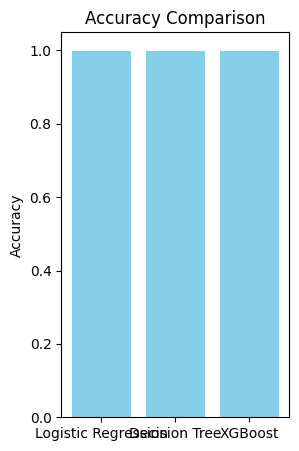

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precision')

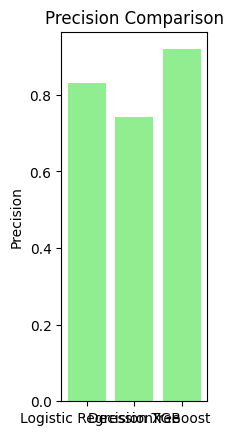

In [16]:
plt.subplot(1, 3, 2)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision Comparison')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

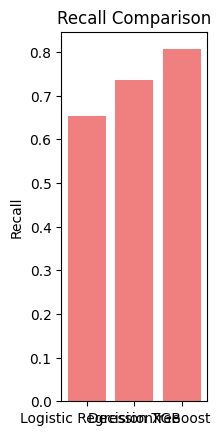

In [17]:
plt.subplot(1, 3, 3)
plt.bar(models, recalls, color='lightcoral')
plt.title('Recall Comparison')
plt.ylabel('Recall')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

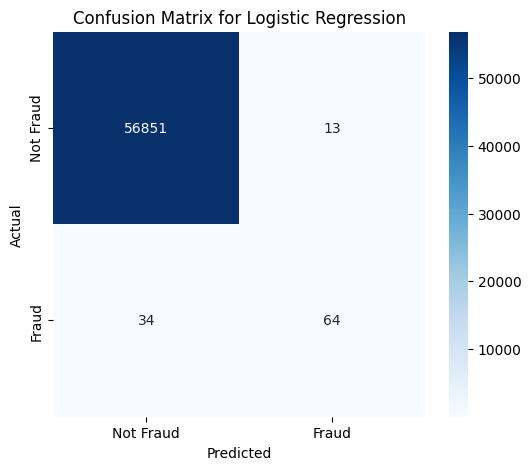

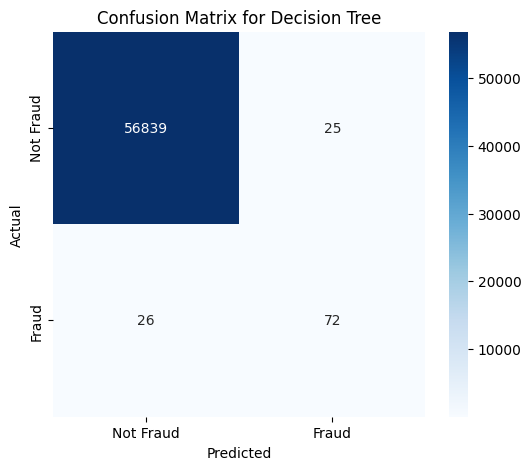

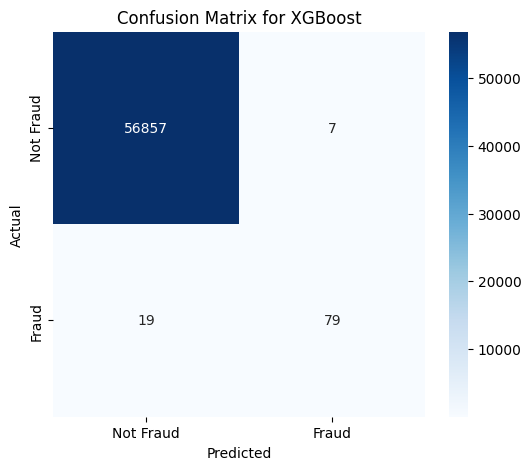

In [20]:
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dec_tree, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

In [21]:
print("Experimental Setup:")
print("Dataset: Credit Card Fraud Detection")
print(f"Total samples: {len(data)}")
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
print("Models compared: Logistic Regression, Decision Tree, XGBoost")

Experimental Setup:
Dataset: Credit Card Fraud Detection
Total samples: 284807
Training samples: 227845, Test samples: 56962
Models compared: Logistic Regression, Decision Tree, XGBoost
